##### source: https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

##### Preprocessing Input data
######  這一組數據的答案是： $y=0.2x+4+\epsilon$

In [8]:
data = pd.read_csv('task1.training.csv')
X = data.iloc[:, 0:10]
Y = data.iloc[:, 10]
# plt.scatter(avg_x, Y)
# plt.show()

In [28]:
# initial guess
# m = 5
c = 5
mc_ary = [1, 5, 5, 5, 5, 5, 5, 5, 5, 5]

In [10]:
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,12.3504,11.1348,12.2830,15.2634,2.1816,2.1481,0.5091,9.0213,12.4283,8.3838
1,9.3637,12.2784,8.8222,2.0414,14.4623,3.5901,2.1357,13.4832,10.7378,15.1303
2,13.2916,15.9057,16.4435,10.3739,5.7188,3.7080,5.6332,9.2375,10.4080,15.9636
3,8.1896,11.4224,8.9549,14.1355,6.5579,2.7926,4.6686,8.8452,8.0353,15.0181
4,9.3945,12.7940,6.9464,16.5530,4.2468,2.4466,5.4304,23.6392,8.3094,21.8089
...,...,...,...,...,...,...,...,...,...,...
9995,30.2144,5.8093,20.6272,11.1174,8.8305,1.3351,4.9750,10.3539,15.7153,12.6161
9996,14.3806,13.2676,17.4470,18.2339,4.0708,2.0318,3.8855,21.2139,5.0144,21.7601
9997,19.5332,4.7467,20.1471,10.5111,10.1998,3.0217,5.2233,13.7275,15.2269,14.9959
9998,7.5970,11.7778,7.6687,2.2844,18.9526,1.2800,4.3013,26.1700,9.4002,20.7900


In [22]:
gap_x_list = []
for i in range(10):
    loc = X.iloc[:, i]
    gap_x_list.append(abs(loc.max() - loc.min()))

print('gap_x_list: ', gap_x_list)

# 這是一個方便的指令；一個指令完成一個 series 的運算
# tempY = m*X + c
# tempY[0:5]

gap_x_list:  [25.9871, 11.990300000000001, 15.9962, 17.9989, 17.997, 3.9996, 5.9988, 25.9944, 11.9955, 15.999600000000001]


In [27]:
print(X[0:5])
Y_pred = mc_ary*X
print(Y_pred[0:5])

# Y[0:5]

        f0       f1       f2       f3       f4      f5      f6       f7  \
0  12.3504  11.1348  12.2830  15.2634   2.1816  2.1481  0.5091   9.0213   
1   9.3637  12.2784   8.8222   2.0414  14.4623  3.5901  2.1357  13.4832   
2  13.2916  15.9057  16.4435  10.3739   5.7188  3.7080  5.6332   9.2375   
3   8.1896  11.4224   8.9549  14.1355   6.5579  2.7926  4.6686   8.8452   
4   9.3945  12.7940   6.9464  16.5530   4.2468  2.4466  5.4304  23.6392   

        f8       f9  
0  12.4283   8.3838  
1  10.7378  15.1303  
2  10.4080  15.9636  
3   8.0353  15.0181  
4   8.3094  21.8089  


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9
0,12.3504,55.6740,61.4150,76.3170,10.9080,10.7405,2.5455,45.1065,62.1415,41.9190
1,9.3637,61.3920,44.1110,10.2070,72.3115,17.9505,10.6785,67.4160,53.6890,75.6515
2,13.2916,79.5285,82.2175,51.8695,28.5940,18.5400,28.1660,46.1875,52.0400,79.8180
3,8.1896,57.1120,44.7745,70.6775,32.7895,13.9630,23.3430,44.2260,40.1765,75.0905
4,9.3945,63.9700,34.7320,82.7650,21.2340,12.2330,27.1520,118.1960,41.5470,109.0445


In [7]:
# Building the model

L = 0.0001  # The learning Rate
epochs = 1000  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

for i in range(epochs): 
    # Y_pred = m*X + c  # The current predicted value of Y
    Y_pred = X.map()
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # 相當於做 X_1 的微分，但是這裡依賴數據的誤差資訊
    D_c = (-2/n) * sum(Y - Y_pred)  # 相當於做 X_0 的微分，但是這裡依賴數據的誤差資訊；X_0=1所以不必乘
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    Y_pred = m*X + c

print (m, c)

0.7223035280773301 5.290736097285668


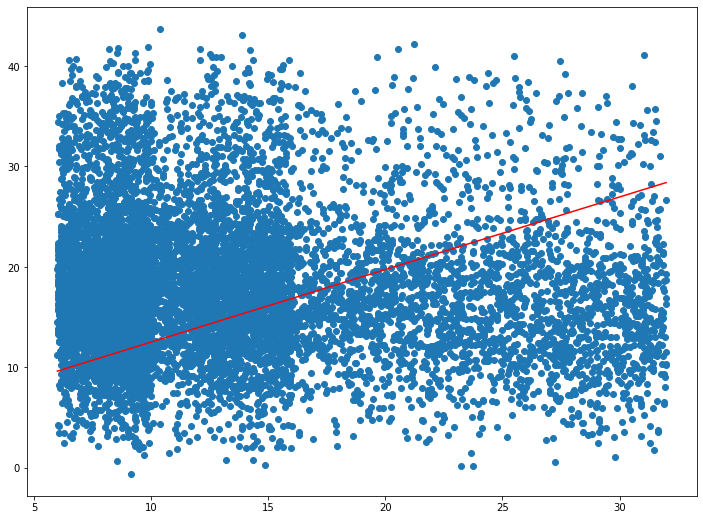

In [8]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()